In [1]:
library(readxl)

In [3]:
Learning_data = read_excel("D:\\Amar\\Codes_Data\\Learning.xlsx")

In [12]:
Learning_data

id,pre_test,post_test,follow_up
<dbl>,<dbl>,<dbl>,<dbl>
1,0.4005027,0.5182286,0.7107831
2,0.2558124,0.6912915,0.6308434
3,0.3244241,0.4443434,0.9778410
4,0.3419538,0.4711696,0.8347124
5,0.2871243,0.3908429,0.6457287
6,0.2045868,0.5340549,0.6653224
7,0.3525992,0.5580695,0.6840157
8,0.3179425,0.4370234,0.7818623
9,0.3507964,0.4399808,0.8471229


In [10]:
library(rstatix)

In [9]:
library(tidyverse)

In [13]:
Learning_data = Learning_data %>% rename(pre_test = t1, post_test = t2, follow_up = t3)

ERROR: [1m[33mError[39m in `rename()`:[22m
[33m![39m Can't rename columns that don't exist.
[31m✖[39m Column `t1` doesn't exist.


In [14]:
Learning_data

id,pre_test,post_test,follow_up
<dbl>,<dbl>,<dbl>,<dbl>
1,0.4005027,0.5182286,0.7107831
2,0.2558124,0.6912915,0.6308434
3,0.3244241,0.4443434,0.9778410
4,0.3419538,0.4711696,0.8347124
5,0.2871243,0.3908429,0.6457287
6,0.2045868,0.5340549,0.6653224
7,0.3525992,0.5580695,0.6840157
8,0.3179425,0.4370234,0.7818623
9,0.3507964,0.4399808,0.8471229


## تغییر فرمت ستون ها

In [15]:
Learning_data = Learning_data %>% gather(key = "time", value = "Learning_rate", pre_test, post_test, follow_up)

In [16]:
Learning_data

id,time,Learning_rate
<dbl>,<chr>,<dbl>
1,pre_test,0.4005027
2,pre_test,0.2558124
3,pre_test,0.3244241
4,pre_test,0.3419538
5,pre_test,0.2871243
6,pre_test,0.2045868
7,pre_test,0.3525992
8,pre_test,0.3179425
9,pre_test,0.3507964


In [17]:
Learning_data %>% group_by(time) %>% get_summary_stats(Learning_rate, type ="mean_sd")

time,variable,n,mean,sd
<chr>,<fct>,<dbl>,<dbl>,<dbl>
follow_up,Learning_rate,10,0.764,0.114
post_test,Learning_rate,10,0.493,0.086
pre_test,Learning_rate,10,0.314,0.055


In [19]:
library(ggpubr)

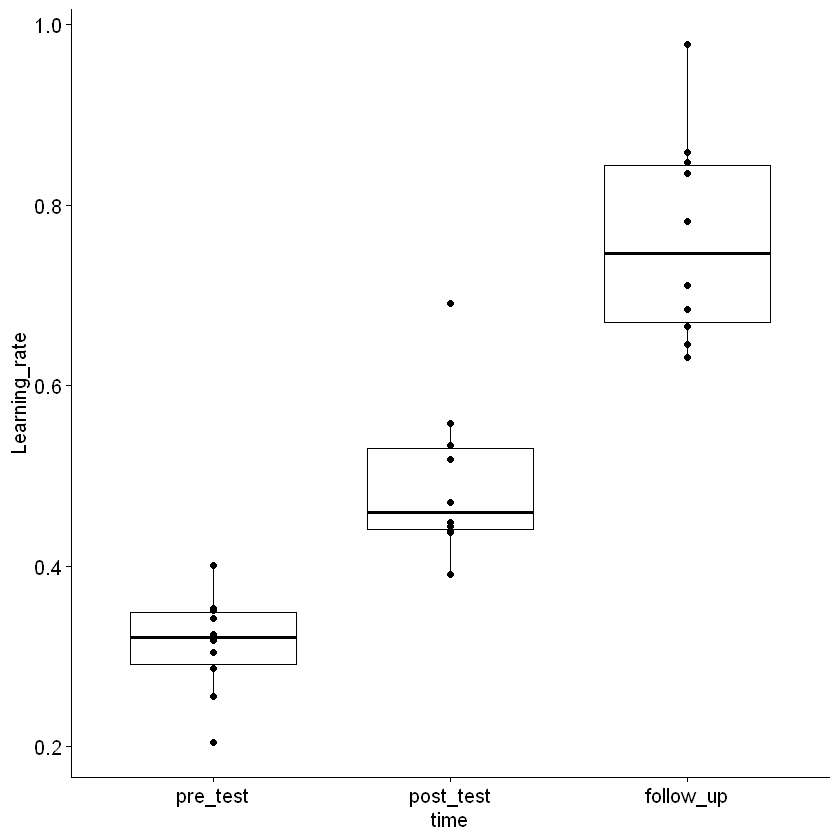

In [21]:
ggboxplot(Learning_data, x= "time", y = "Learning_rate", add = "point")

In [23]:
Learning_data %>% group_by(time) %>% identify_outliers(Learning_rate
                                                      )

time,id,Learning_rate,is.outlier,is.extreme
<chr>,<dbl>,<dbl>,<lgl>,<lgl>
post_test,2,0.6912915,TRUE,FALSE
pre_test,6,0.2045868,TRUE,FALSE


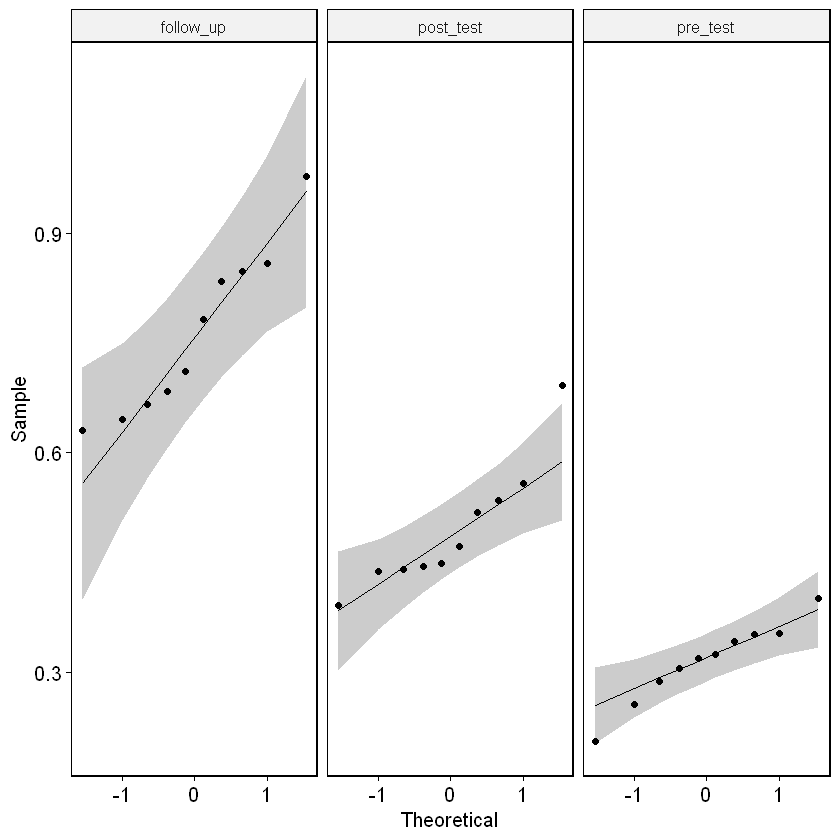

In [24]:
ggqqplot(Learning_data, "Learning_rate", facet.by = "time")

In [25]:
Learning_data %>% group_by(time) %>% shapiro_test(Learning_rate)

time,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
follow_up,Learning_rate,0.9227149,0.3801562
post_test,Learning_rate,0.8758846,0.1169956
pre_test,Learning_rate,0.9666901,0.8585765


In [27]:
anova_test(data = Learning_data, dv = Learning_rate, wid = id, within = time)

ANOVA Table (type III tests)

$ANOVA
  Effect DFn DFd      F        p p<.05   ges
1   time   2  18 55.469 2.01e-08     * 0.829

$`Mauchly's Test for Sphericity`
  Effect     W     p p<.05
1   time 0.551 0.092      

$`Sphericity Corrections`
  Effect  GGe      DF[GG]    p[GG] p[GG]<.05   HFe      DF[HF]    p[HF]
1   time 0.69 1.38, 12.42 2.16e-06         * 0.774 1.55, 13.94 6.03e-07
  p[HF]<.05
1         *

## Post-hoc tests

In [30]:
Learning_data %>% pairwise_t_test(Learning_rate ~ time, paired = TRUE, p.adjust.method = "bonferroni")

,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Learning_rate,follow_up,post_test,10,10,4.867816,9,8.86e-04,3e-03,**
2,Learning_rate,follow_up,pre_test,10,10,13.228148,9,3.34e-07,1e-06,****
3,Learning_rate,post_test,pre_test,10,10,4.967619,9,7.72e-04,2e-03,**


In [34]:
pwc = Learning_data %>% pairwise_t_test(Learning_rate ~ time, paired = TRUE, p.adjust.method = "bonferroni")

In [35]:
bxp = ggboxplot(Learning_data, x= "time", y = "Learning_rate", add = "point")

In [36]:
pwc = pwc %>% add_xy_position(x = "time")

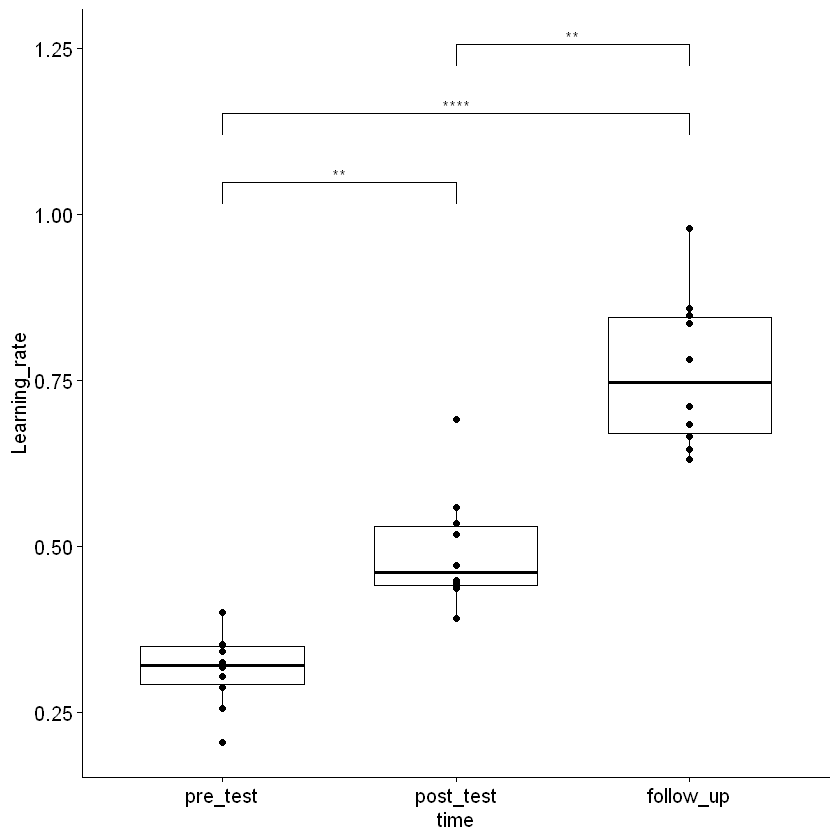

In [37]:
bxp + stat_pvalue_manual(pwc)